In [ ]:
# Expt1......
# Question 1 A

In [5]:
#y_hat=m*x+c
import numpy as np
def predict(x,parameters):
  return x*parameters[1]+parameters[0]  #mx+c

In [16]:
import matplotlib.pyplot as plt
def fit(x,y,parameter,alpha,epoch): 
    sum_errors=list()
    for no_time in range(epoch):
        sum_error=0
        for i in range(len(x)):
            y_hat=predict(x[i],parameter)
            error=y_hat-y[i] #y[i]-y_hat
            sum_error=sum_error+error**2
            #sum_error=sum_error+abs(error)
            parameter[1]=parameter[1]-(alpha*error*x[i]) ##m = m -alpha *error*x
            parameter[0]=parameter[0]-(alpha*error)  # c = c - alpha * error 
        sum_errors.append(sum_error)
        print("epoch ",no_time,"sum error : ",sum_error)
    plt.plot(range(epoch),sum_errors)
    plt.xlabel("Epoch")
    plt.ylabel("Sum error")
    plt.show()
    print("m= ",parameter[1],"c= ",parameter[0])
    return parameter
        

epoch  0 sum error :  13.593050246612497
epoch  1 sum error :  12.689316840403439
epoch  2 sum error :  11.845846756736124
epoch  3 sum error :  11.05862164458711
epoch  4 sum error :  10.323891090275795
epoch  5 sum error :  9.638154752020075
epoch  6 sum error :  8.998145685711913
epoch  7 sum error :  8.400814782485764
epoch  8 sum error :  7.8433162439486415
epoch  9 sum error :  7.322994025883551
epoch  10 sum error :  6.837369185851224
epoch  11 sum error :  6.384128074420775
epoch  12 sum error :  5.961111313778526
epoch  13 sum error :  5.566303511214805
epoch  14 sum error :  5.19782365848917
epoch  15 sum error :  4.853916171341555
epoch  16 sum error :  4.532942526466268
epoch  17 sum error :  4.233373456111624
epoch  18 sum error :  3.9537816631243228
epoch  19 sum error :  3.6928350217367223
epoch  20 sum error :  3.4492902317090666
epoch  21 sum error :  3.221986895598144
epoch  22 sum error :  3.0098419909395075
epoch  23 sum error :  2.8118447110114664
epoch  24 sum err

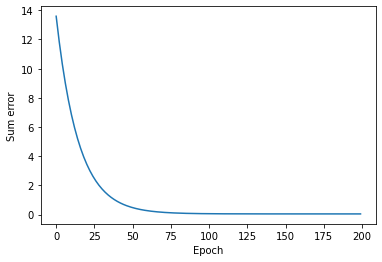

m=  0.45965692832413396 c=  0.5405770351680035
updated parameters [0.5405770351680035, 0.45965692832413396]


In [17]:
x1=np.array([89,66,78,111,44,77,80,66,109,75,85,110,45,79,90,76,81],dtype='float64')
y1=np.array([7,5.4,6.6,7.4,4.8,6.4,7,5.6,7.3,6.4,6.9,7.3,4.8,6.8,7,6.5,7],dtype='float64')
# to normalize data... scaling of data...
x=x1/np.mean(x1)  
y=y1/np.mean(y1)
#print(np.mean(x))
parameter=[0.1,0.0]  #[c,m]
alpha=0.001
epoch=200
up_parameter=fit(x,y,parameter,alpha,epoch)
print("updated parameters",up_parameter)


In [18]:
#x=np.array([89,66,78,111,44,77,80,66,109,75,85,110,45,79,90,76,81],dtype='float64')
#y=np.array([7,5.4,6.6,7.4,4.8,6.4,7,5.6,7.3,6.4,6.9,7.3,4.8,6.8,7,6.5,7],dtype='float64')
#x=x/np.mean(x)
#y=y/np.mean(y)
y_hat=[predict(i,up_parameter) for i in x]
print("Actual ",y)
print("Predicted", y_hat)

Actual  [1.07985481 0.83303085 1.01814882 1.1415608  0.74047187 0.98729583
 1.07985481 0.86388385 1.1261343  0.98729583 1.06442831 1.1261343
 0.74047187 1.04900181 1.07985481 1.00272232 1.07985481]
Predicted [1.0515696380735249, 0.9195153699069295, 0.9884132489503705, 1.1778824163198336, 0.7932025916606208, 0.9826717590300837, 0.9998962287909441, 0.9195153699069295, 1.16639943647926, 0.9711887791895103, 1.0286036783923778, 1.1721409263995468, 0.7989440815809076, 0.9941547388706573, 1.0573111279938117, 0.9769302691097971, 1.0056377187112309]


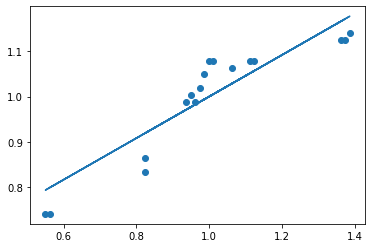

In [19]:
plt.scatter(x,y)  # Original Data
plt.plot(x,y_hat) #
plt.show()

In [20]:
#y_hat=y_hat/np.mean(y_hat)
SSR,SST=0,0
for i in range(len(y)):
    SSR+=(y_hat[i]-np.mean(y))**2
    SST+=(y[i]-np.mean(y))**2
R_sqr = SSR/SST
print("R Square",R_sqr)

R Square 0.7291564181141981


In [21]:
#y=? at x=81...
print(up_parameter)
y2=predict(81/np.mean(x1),up_parameter)
print(y2*np.mean(y1))
#print(np.mean(y1))

[0.5405770351680035, 0.45965692832413396]
6.518898623645743


In [ ]:
#EXPT #1:
#Use sklearn to implement Simple Linear Regression Model using CO2 Emission Dataset.

In [22]:
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np

In [23]:
df =pd.read_csv("FuelConsumption.csv")
df.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUEL,FUELCONSUMPTION_City,FUEL CONSUMPTION_HWY,FUELCONSUMPTION_COMB,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,244


In [ ]:
# summarize the data
df.describe()

In [24]:
#Which features can be selected...
cdf = df[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB','CO2EMISSIONS']]
cdf.head()

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_COMB,CO2EMISSIONS
0,2.0,4,8.5,196
1,2.4,4,9.6,221
2,1.5,4,5.9,136
3,3.5,6,11.1,255
4,3.5,6,10.6,244


In [ ]:
# Histogram is constructed to check data is normalized or not...
#viz = df[['CYLINDERS','ENGINESIZE','CO2EMISSIONS','FUELCONSUMPTION_COMB']]
cdf.hist()
plt.show()

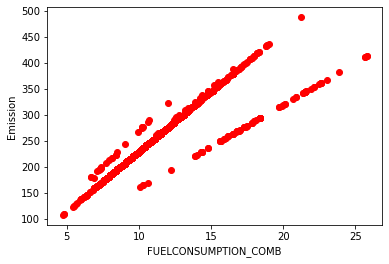

In [25]:
# Scatter plot to check correlation between two varaibles(features)
plt.scatter(df.FUELCONSUMPTION_COMB, df.CO2EMISSIONS,color='red')
plt.xlabel("FUELCONSUMPTION_COMB")
plt.ylabel("Emission")
plt.show()

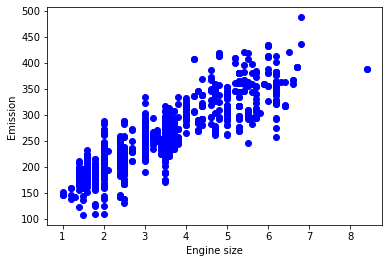

In [26]:
plt.scatter(df.ENGINESIZE, df.CO2EMISSIONS,  color='blue')
plt.xlabel("Engine size")
plt.ylabel("Emission")
plt.show()

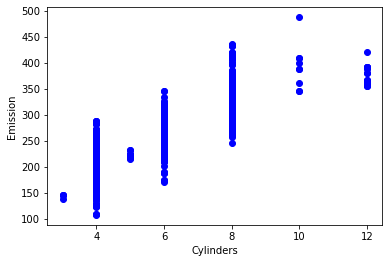

In [27]:
plt.scatter(df.CYLINDERS, df.CO2EMISSIONS, color='blue')
plt.xlabel("Cylinders")
plt.ylabel("Emission")
plt.show()

In [5]:
# using sklearn for training and testing...
msk = np.random.rand(len(df)) < 0.7
print(msk)
train = df[msk]  #70%
test = df[~msk]

[ True False False ...  True  True  True]


In [ ]:
train.head()

In [ ]:
print("No of Observation",len(df))
print("No of Observation selected for trainning ",len(train))
print("No of observation selected for testing",len(test))

In [6]:
train.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUEL,FUELCONSUMPTION_City,FUEL CONSUMPTION_HWY,FUELCONSUMPTION_COMB,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,196
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,244
6,2014,ACURA,TL,MID-SIZE,3.5,6,AS6,Z,11.8,8.1,10.1,232
7,2014,ACURA,TL AWD,MID-SIZE,3.7,6,AS6,Z,12.8,9.0,11.1,255


In [29]:
# selecting Enginesize and CO2Emission as independent and dependent varaibles...
from sklearn import linear_model
regx = linear_model.LinearRegression()
train_x = np.asanyarray(train[['ENGINESIZE']])
train_y = np.asanyarray(train[['CO2EMISSIONS']])
regx.fit (train_x, train_y)
# The coefficients
print ('Coefficients: ', regx.coef_)  #m
print ('Intercept: ',regx.intercept_)  #c 

Coefficients:  [[39.348736]]
Intercept:  [123.87271397]


Text(0, 0.5, 'Emission')

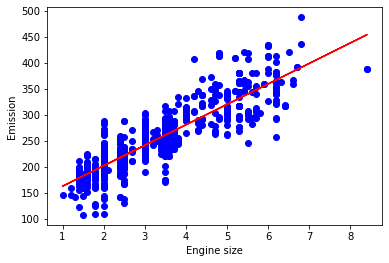

In [30]:
# plotting scatter plot and best fit line...
plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS,  color='blue')
plt.plot(train_x, regx.coef_[0][0]*train_x + regx.intercept_[0], '-r')
plt.xlabel("Engine size")
plt.ylabel("Emission")

In [31]:
# Model Evaluation
# Mean Squared Error (MSE)
# Mean Absolute Error
# R-squared -->The higher the R-squared, the better the model fits your data. 
# Best possible score is 1.0 


from sklearn.metrics import r2_score

test_x = np.asanyarray(test[['ENGINESIZE']])
test_y = np.asanyarray(test[['CO2EMISSIONS']])
test_y_hat = regx.predict(test_x)

print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y_hat - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((test_y_hat - test_y) ** 2))
print("R2-score: %.2f" % r2_score(test_y_hat , test_y) )


Mean absolute error: 22.40
Residual sum of squares (MSE): 861.33
R2-score: 0.71


In [1]:
## Multiple Linear Regression
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np

In [2]:
df = pd.read_csv("FuelConsumption.csv")
df.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUEL,FUELCONSUMPTION_City,FUEL CONSUMPTION_HWY,FUELCONSUMPTION_COMB,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,244


In [3]:
cdf = df[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_City','FUEL CONSUMPTION_HWY','FUELCONSUMPTION_COMB','CO2EMISSIONS']]
cdf.head()

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_City,FUEL CONSUMPTION_HWY,FUELCONSUMPTION_COMB,CO2EMISSIONS
0,2.0,4,9.9,6.7,8.5,196
1,2.4,4,11.2,7.7,9.6,221
2,1.5,4,6.0,5.8,5.9,136
3,3.5,6,12.7,9.1,11.1,255
4,3.5,6,12.1,8.7,10.6,244


In [ ]:
plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS,  color='blue')
plt.xlabel("Engine size")
plt.ylabel("Emission")
plt.show()

In [ ]:
plt.scatter(train.CYLINDERS, train.CO2EMISSIONS,  color='blue')
plt.xlabel("CYLINDERS")
plt.ylabel("CO2EMISSIONS")
plt.show()

In [ ]:
plt.scatter(train.FUELCONSUMPTION_COMB, train.CO2EMISSIONS,  color='blue')
plt.xlabel("Engine size")
plt.ylabel("FUELCONSUMPTION_COMB")
plt.show()

In [7]:
from sklearn import linear_model
regr = linear_model.LinearRegression()
x = np.asanyarray(train[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB']]) #x1 x2 x3
y = np.asanyarray(train[['CO2EMISSIONS']])  #y
regr.fit (x, y)

#y hat = c + x1m1+ x2m2+x3m3   // coe or para

# The coefficients
print ('Coefficients: ', regr.coef_)  #m1,m2,m3
print ('Intercept: ',regr.intercept_)  #c 

Coefficients:  [[10.24349785  7.44901107  9.9659721 ]]
Intercept:  [63.84352252]


In [8]:
y_hat= regr.predict(test[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB']])
x = np.asanyarray(test[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB']])
y = np.asanyarray(test[['CO2EMISSIONS']])
print("Residual sum of squares: %.2f"
      % np.mean((y_hat - y) ** 2))

# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % regr.score(x, y))

Residual sum of squares: 551.63
Variance score: 0.86


In [10]:
## Multinear Regression From Scrach....
import numpy as np

In [11]:
X = np.matrix([[1,1000,10,80],[1,2000,30,90],[1,4500,60,100],[1,5000,80,200]]) #4 data x0,x1,x2,x3
Y = np.matrix([[10],[15],[30],[50]])
print(X)
print(Y)

[[   1 1000   10   80]
 [   1 2000   30   90]
 [   1 4500   60  100]
 [   1 5000   80  200]]
[[10]
 [15]
 [30]
 [50]]


In [12]:
XT = X.T 
XT

matrix([[   1,    1,    1,    1],
        [1000, 2000, 4500, 5000],
        [  10,   30,   60,   80],
        [  80,   90,  100,  200]])

In [13]:
XTX_inv = np.dot(XT,X).I

In [14]:
B = np.dot(XTX_inv , np.dot(XT,Y))
print(B)  # c m1 m2 m3

[[-1.28571429e+01]
 [ 8.57142857e-03]
 [-2.85714286e-01]
 [ 2.14285714e-01]]


In [15]:
y_hat = np.dot(X,B)

In [16]:
print(Y)
print(y_hat)

[[10]
 [15]
 [30]
 [50]]
[[10.]
 [15.]
 [30.]
 [50.]]


In [17]:
error = Y-y_hat
error

matrix([[ 3.68238773e-12],
        [ 2.34123831e-12],
        [-7.10542736e-13],
        [-6.89226454e-13]])

In [18]:
error_T = error.T

In [19]:
error_T

matrix([[ 3.68238773e-12,  2.34123831e-12, -7.10542736e-13,
         -6.89226454e-13]])

In [20]:
SSR = np.dot(error_T,error)

In [ ]:
SSR

In [21]:
eps = np.sqrt(SSR)

In [ ]:
eps

In [22]:
yhat = np.dot([[1,10000,160,10]],B)
yhat

matrix([[29.28571429]])

In [ ]:
## Bike Dataset... Hour Dataset...

In [ ]:
def make_X_mat(dataset):
    X = []
    for i in range(len(dataset)):
        X.append([1])
        
        X[i]+=(dataset[i])
    return np.matrix(X)



In [ ]:
def get_Beta(X,Y):
    XT = X.T
    XTX_inv = np.dot(XT,X).I
    return np.dot(XTX_inv , np.dot(XT,Y))

In [ ]:
def predict(X,B):
    return(np.dot(X,B))

In [ ]:
import matplotlib.pyplot as plt
#%matplotlib notebook
import pandas as pd

In [ ]:
# Using Bike Hours Data...
df = pd.read_csv('hour.csv')
df.head()

In [ ]:
df.drop(['dteday'],axis=1,inplace=True)
df.drop(['instant'],1,inplace = True)
full_data = df.astype(float).values.tolist()


In [ ]:
df.head()
#full_data

In [ ]:
Xdat = df.drop(['cnt'],1).astype(float).values.tolist()
Xdat

In [ ]:
Y = np.matrix(full_data)[:,-1]  
Y

In [ ]:
X = make_X_mat(Xdat)

In [ ]:
B =get_Beta(X,Y)
B

In [ ]:
yhat = predict(X,B)

In [ ]:
print(Y)
np.matrix(yhat)

In [ ]:
eps = Y-yhat

In [ ]:
eps

In [ ]:
epst = eps.T
epst

In [ ]:
#E=np.dot(eps,epst)

In [ ]:
#Using Co2Emisson data....

In [ ]:
df = pd.read_csv("FuelConsumption.csv")
df.head()

In [ ]:
#df.drop(['ModelYear'],1,inplace = True)
#df.drop(['Make'],1,inplace = True)
mdf_x = df[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB']]
X_dat = mdf_x.astype(float).values.tolist()

In [ ]:
Y= df[['CO2EMISSIONS']]
Y = Y.astype(float).values.tolist()

In [ ]:
Y = np.matrix(Y)

In [ ]:
X = make_X_mat(X_dat)

In [ ]:
B =get_Beta(X,Y)

In [ ]:
yhat = predict(X,B)

In [ ]:
eps = Y-yhat

In [ ]:
epsT=eps.T

In [ ]:
epsT

In [ ]:
SSR = np.dot(epsT,eps)

In [ ]:
SSR/len(eps)

In [ ]:
B
Coefficients:  [[9.88920533 8.08267893 9.92484066]]
Intercept:  [61.9804518]

In [ ]:
print(predict([3.5,6,11,1],B))